In [1]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
iris = datasets.load_iris()

In [3]:
type( iris )

sklearn.utils.Bunch

In [4]:
for key in iris.keys():
    print( key )

data
target
frame
target_names
DESCR
feature_names
filename


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.target.size

150

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target.size

150

In [9]:
X = iris.data[50:150, 2:4] # we only take the first two features of two target (eliminate the 'setosa')
X.shape[0]

100

In [10]:
Y = iris.target[50:150]


In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [25]:
#modified from: https://github.com/ddbourgin/numpy-ml/blob/master/numpy_ml/linear_models/lm.py
#A simple logistic regression model fit via gradient descent on the penalized negative log likelihood.
class LogisticRegression_new:
    def __init__(self, penalty="l2", gamma=2, fit_intercept=True):
        err_msg = "penalty must be 'l1' or 'l2', but got: {}".format(penalty)
        assert penalty in ["l2", "l1"], err_msg
        self.beta = None 
        self.gamma = gamma #\gamma` is a regularization weight, Larger values correspond to larger
                            #regularization penalties, and a value of 0 indicates no penalty.
                            #Default is 0.
        self.penalty = penalty #The type of regularization penalty to apply on the coefficients `beta`. Default is 'l2'
        self.fit_intercept = fit_intercept
        # Whether to fit an intercept term in addition to the coefficients in b. If True, the estimates for `beta` 
        #will have `M + 1` dimensions, where the first dimension corresponds to the intercept. Default is True.
        
        
    def fit(self, X, y, lr=0.01, tol=1e-7, max_iter=100):
        # convert X to a design matrix if we're fitting an intercept
        if self.fit_intercept:
            X = np.c_[np.ones(X.shape[0]), X]
            l_prev = np.inf
            self.beta = np.random.rand(X.shape[1])
        for _ in range(int(max_iter)):
            y_pred = sigmoid(np.dot(X, self.beta))
            loss = self._NLL(X, y, y_pred)
            if l_prev - loss < tol:
                return
            l_prev = loss
            self.beta -= lr * self._NLL_grad(X, y, y_pred)
            #lr : float The gradient descent learning rate. Default is 1e-7.
            #max_iter : float, The maximum number of iterations to run the gradient descent, solver. Default is 1e7.

    def _NLL(self, X, y, y_pred):
        N, M = X.shape
        beta, gamma = self.beta, self.gamma 
        order = 2 if self.penalty == "l2" else 1
        norm_beta = np.linalg.norm(beta, ord=order)
        
        nll = -np.log(y_pred[y == 1]).sum() - np.log(1 - y_pred[y == 0]).sum()
        penalty = (gamma / 2) * norm_beta ** 2 if order == 2 else gamma * norm_beta
        return (penalty + nll) / N

    def _NLL_grad(self, X, y, y_pred):
        """Gradient of the penalized negative log likelihood wrt beta"""
        N, M = X.shape
        l1norm = lambda x: np.linalg.norm(x, 1)  # noqa: E731
        p, beta, gamma = self.penalty, self.beta, self.gamma
        d_penalty = gamma * beta if p == "l2" else gamma * np.sign(beta)
        return -(np.dot(y - y_pred, X) + d_penalty) / N

    def predict(self, X):
        #Use the trained model to generate prediction probabilities on a new collection of data points.
        # convert X to a design matrix if we're fitting an intercept
        if self.fit_intercept:
            X = np.c_[np.ones(X.shape[0]), X]
        return sigmoid(np.dot(X, self.beta))


In [26]:
#model = LogisticRegression()
model= LogisticRegression_new()


In [27]:
model.fit( X, Y)

In [28]:
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-29-675a2cf4a5b8>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


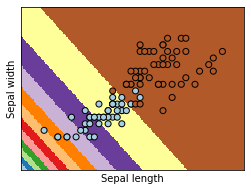

In [29]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## 